# Fuzzy Clustering

In this notebook, we will explore the fuzzy clustering approach with the US Arrests dataset. We will perform following tasks. 

1. Reduce 4 US Arrests features to 2 using PCA. Apply standardization before applying PCA. 
2. Apply Fuzzy C-Means on the transformed data
3. Identify strong and weak member for a cluster


In [6]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Configure some general styling

In [7]:
sns.set_style("white")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (8,7)
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

### T1. Read the data

Read the data from this location: `/dsa/data/DSA-8410/USArrests.csv`

In [8]:
df = pd.read_csv('/dsa/data/DSA-8410/USArrests.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### T2. Standardize the data

In [9]:
# standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df.iloc[:,1:])

# check the data
df_std[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

### T3. Apply PCA

In [10]:
# Data downscaling to 2 principal components using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_std)

# Check data
df_pca[:5]

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399]])

### T4. Reshape the data for fuzzy c-means

In [12]:
df_pca_transposed = df_pca.T

# Check data shape
df_pca_transposed.shape

(2, 50)

### T5. Visualize the data in 2D space

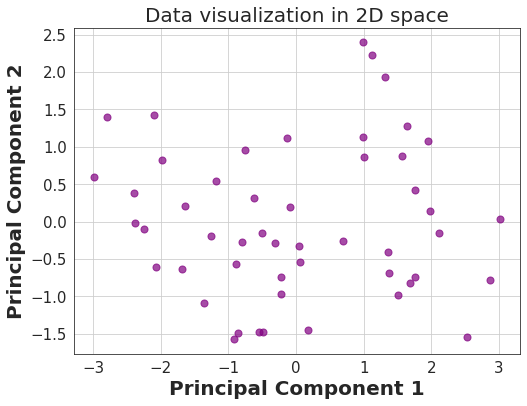

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0],df_pca[:,1],color='purple',s=50,alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data visualization in 2D space')
plt.grid(True)
plt.show()

### T6. Choose the right number of clusters using the fuzzy partition coefficient (FPCs). Plot FPCs vs #clusters. For this plot, choose a suitable set of clusters.  

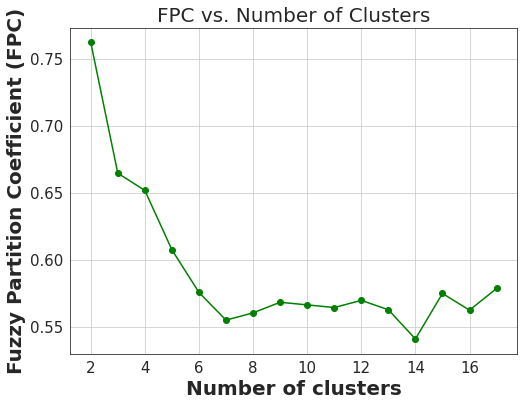

In [17]:
from sklearn.cluster import KMeans
import skfuzzy as fuzz

fpcs = []
n_clusters = range(2,18)

for n in n_clusters:
    cntr,u,u0,d,jm,p,fpc = fuzz.cluster.cmeans(df_pca_transposed,c=n,m=2,error=0.005,maxiter=1000, init=None)
    fpcs.append(fpc)
    
plt.figure(figsize=(8,6))
plt.plot(n_cluster,fpcs,marker='o',color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('FPC vs. Number of Clusters')
plt.grid(True)
plt.show()

### T7. Apply fuzzy c-means with the suitable number of clusters identified in T5

In [18]:
optimal_clusters = 3

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    df_pca_transposed, c=optimal_clusters, m=2, error=0.005, maxiter=1000, init=None)

cluster_membership = np.argmax(u, axis=0)

cluster_membership

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

### T8. Visualize the clusters with centers

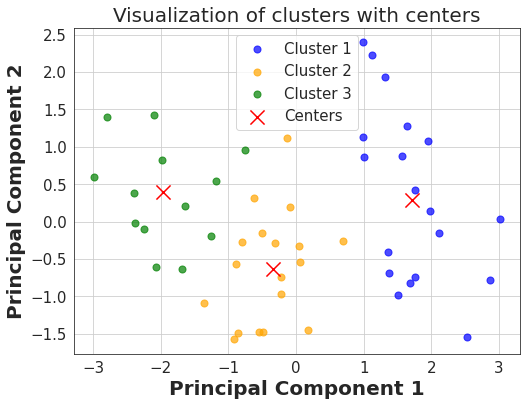

In [19]:
# result od visualize and its center
plt.figure(figsize=(8, 6))

# plot of each clustering
colors = ['b', 'orange', 'g']
for i in range(optimal_clusters):
    plt.scatter(df_pca[cluster_membership == i, 0],
                df_pca[cluster_membership == i, 1], 
                color=colors[i], alpha=0.7, s=50, label=f'Cluster {i+1}')

# lebaling center of each clustering
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', color='red', s=200, label='Centers')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of clusters with centers')
plt.grid(True)
plt.show()

### T9. Indentify the strongest and weakest member of Cluster #2. Visualize these two points.

In [20]:
# Affiliation vector for cluster 2
cluster_2_membership = u[1, :]

# strongest and weakwst idx
strongest_member_idx = np.argmax(cluster_2_membership)
weakest_member_idx = np.argmin(cluster_2_membership)

# print affiliation degree of the strongest and weakest
print(f'Strongest member index: {strongest_member_idx}, Membership: {cluster_2_membership[strongest_member_idx]}')
print(f'Weakest member index: {weakest_member_idx}, Membership: {cluster_2_membership[weakest_member_idx]}')

Strongest member index: 34, Membership: 0.9890391336915925
Weakest member index: 19, Membership: 0.003764054670377522


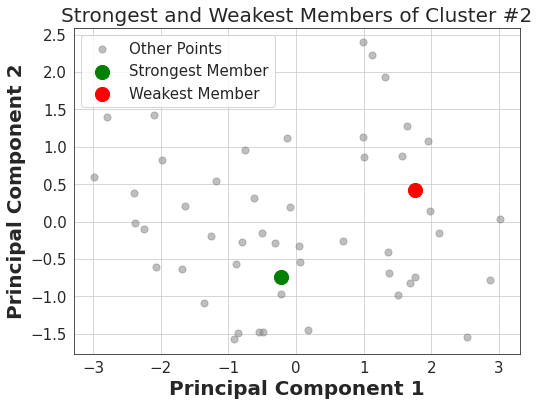

In [21]:
# visualized the two point
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], color='gray', alpha=0.5, s=50, label='Other Points')
plt.scatter(df_pca[strongest_member_idx, 0], df_pca[strongest_member_idx, 1], 
            color='green', s=200, label='Strongest Member')
plt.scatter(df_pca[weakest_member_idx, 0], df_pca[weakest_member_idx, 1], 
            color='red', s=200, label='Weakest Member')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Strongest and Weakest Members of Cluster #2')
plt.legend()
plt.grid(True)
plt.show()


### T10. Do these weak and strong points make sense? Why or Why not?

In [ ]:
The distribution of strong and weak points is consistent with the expected behavior of fuzzy clustering, with the strongest points near the center of the clusters and the weakest points near other clusters or border regions.

# Save your notebook, then `File > Close and Halt`